In [15]:
import pandas as pd
import matplotlib.pyplot as plt

file = r'data_set/drinks.csv'
drinks = pd.read_csv(file)
drinks.info()
print(drinks.describe())
print(drinks.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
       beer_servings  spirit_servings  wine_servings  \
count     193.000000       193.000000     193.000000   
mean      106.160622        80.994819      49.450777   
std       101.143103        88.284312      79.697598   
min         0.000000         0.000000       0.000000   
25%        20.000000         4.000000       1.000000   
50%        76.000000        56.000000       8.000000   
75%       188.000000       128.000000      59.000000   
max       376.000000       438.000000     370.000000   

       total_litres

In [2]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [3]:
drinks['beer_servings'].describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64

In [4]:
euro_frame = drinks[drinks['continent'] == 'EU']
euro_frame

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [5]:
euro_300_frame = drinks[(drinks['continent'] == 'EU') &
                        (drinks['wine_servings'] > 300)]
euro_300_frame

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [6]:
top_ten = drinks.sort_values(by='total_litres_of_pure_alcohol',
                             ascending=False).head(10)
top_ten

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,NaN
45,Czech Republic,361,170,134,11.8,EU
61,France,127,151,370,11.8,EU
141,Russian Federation,247,326,73,11.5,AS
81,Ireland,313,118,165,11.4,EU
155,Slovakia,196,293,116,11.4,EU
99,Luxembourg,236,133,271,11.4,EU


In [7]:
drinks['continent'].fillna(value='NA', inplace=True)
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [8]:
drinks[
    'Total_servings'] = drinks.beer_servings + drinks.wine_servings + drinks.spirit_servings
drinks['alcohol_ml'] = drinks.total_litres_of_pure_alcohol * 1000

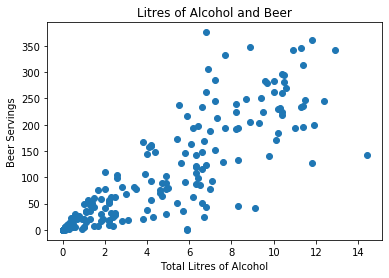

In [9]:
plt.figure()
plt.scatter(drinks['total_litres_of_pure_alcohol'], drinks['beer_servings'])
plt.xlabel('Total Litres of Alcohol')
plt.ylabel('Beer Servings')
plt.title('Litres of Alcohol and Beer')
plt.show()

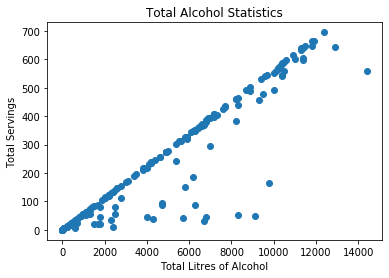

In [10]:
plt.figure()
plt.scatter(drinks['alcohol_ml'], drinks['Total_servings'])
plt.xlabel('Total Litres of Alcohol')
plt.ylabel('Total Servings')
plt.title('Total Alcohol Statistics')
plt.show()